# Churn analyses (Classification and Clustering)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.utils import resample

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

This data set contains details of a bank's customers and our target variable reflects the fact whether customers closed their accounts or not.

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


* 'CustomerID' - Unique Ids for bank customer identification
* 'Surname' - Customer's last name
* 'CreditScore' - Credit score of the customer
* 'Geography' - The country to which the customer belongs
* 'Tenure' - Number of years for which the customer has been with the bank
* 'Balance' - Bank balance of the customer
* 'NumOfProducts' - Number of bank products the customer is utilising
* 'HasCrCard' - Binary Flag for whether the customer holds a credit card with the bank or not
* 'IsActiveMember' - Binary Flag for whether the customer is an active member with the bank or not
* 'EstimatedSalary' - Estimated salary of the customer in Dollars
* 'Exited' - Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

In [6]:
#Dropping some columns that are not relevant for our analyses.
df = df.drop(["RowNumber",'CustomerId','Surname'], axis=1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Looking at the table above we can see that from the first sight we don't have outliers. 

Let's do some visualizations to get more familiar with data.

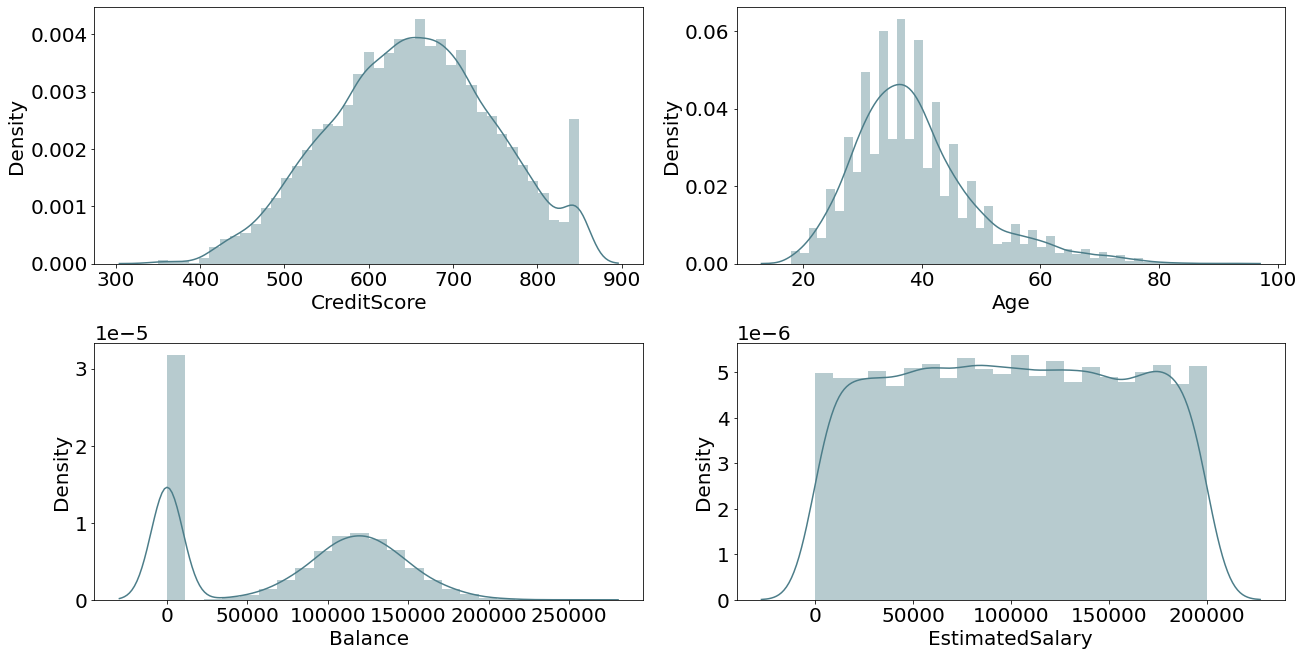

In [70]:
sns.set_palette('crest')
col2 = ['#b3ced4', "#4c7d89", "#6d4d44", "#cfa095", "#c3c2c6"]
plt.rcParams["figure.figsize"]=(18,9)
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.distplot(df['CreditScore'], color = col2[1])

ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.distplot(df['Age'], color = col2[1])

ax3 = fig.add_subplot(gs[1,0])
ax3 = sns.distplot(df['Balance'],color = col2[1])

ax4 = fig.add_subplot(gs[1,1])
ax4 = sns.distplot(df['EstimatedSalary'],color = col2[1])

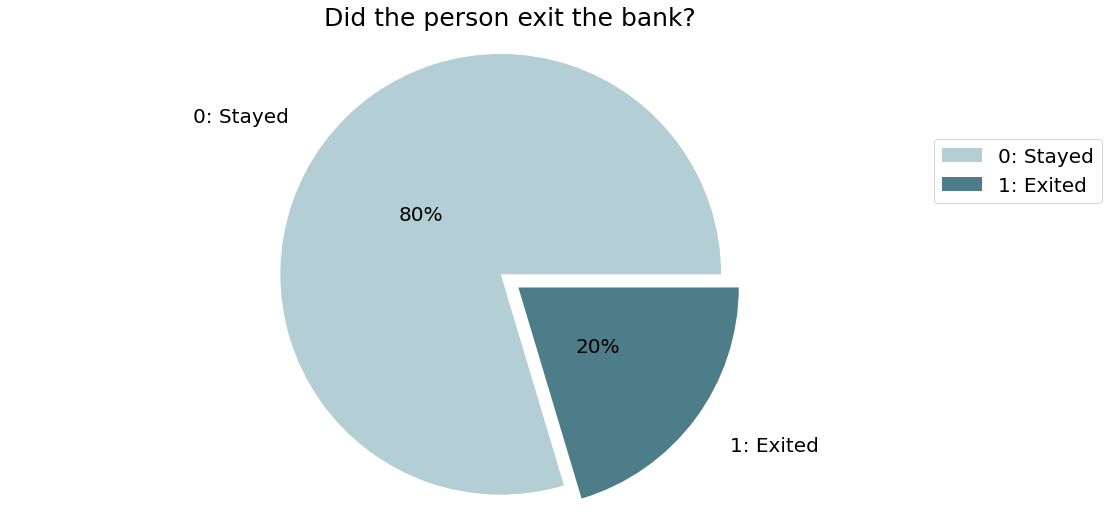

The 79.63  of customers didn't exit.
The 20.37 % of customers exited.


In [12]:
fig, ax = plt.subplots()
colors = ['#6c7b88','#6c4742','#e2ecf0','#9ea4a4','#073c4c']
col = ["#dad9e1","#d3c2ba","#53a3ae","#294668","#002345"]
col1 = ["#69bbd4","#f0eef5","#c77d7e","#c0c9cd","#004a82"]
col2 = ['#b3ced4', "#4c7d89", "#6d4d44", "#cfa095", "#c3c2c6"]
plt.rcParams['text.color'] = 'black'

plt.rcParams['font.size']=20
labels = ['0: Stayed', '1: Exited']
percentages = df['Exited'].value_counts()/sum(df['Exited'].value_counts()) *100
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', startangle=0,   
       pctdistance=0.45,labeldistance=1.2, colors = col2)
ax.axis('equal')
ax.set_title("Did the person exit the bank?", size = 25)
ax.legend(bbox_to_anchor=(1.1,0.8))
plt.show()

print("The", round(df['Exited'].value_counts()[0]/len(df) * 100,2), " of customers didn't exit.")
print('The', round(df['Exited'].value_counts()[1]/len(df) * 100,2), '% of customers exited.')


As we see we have imbalanced data.

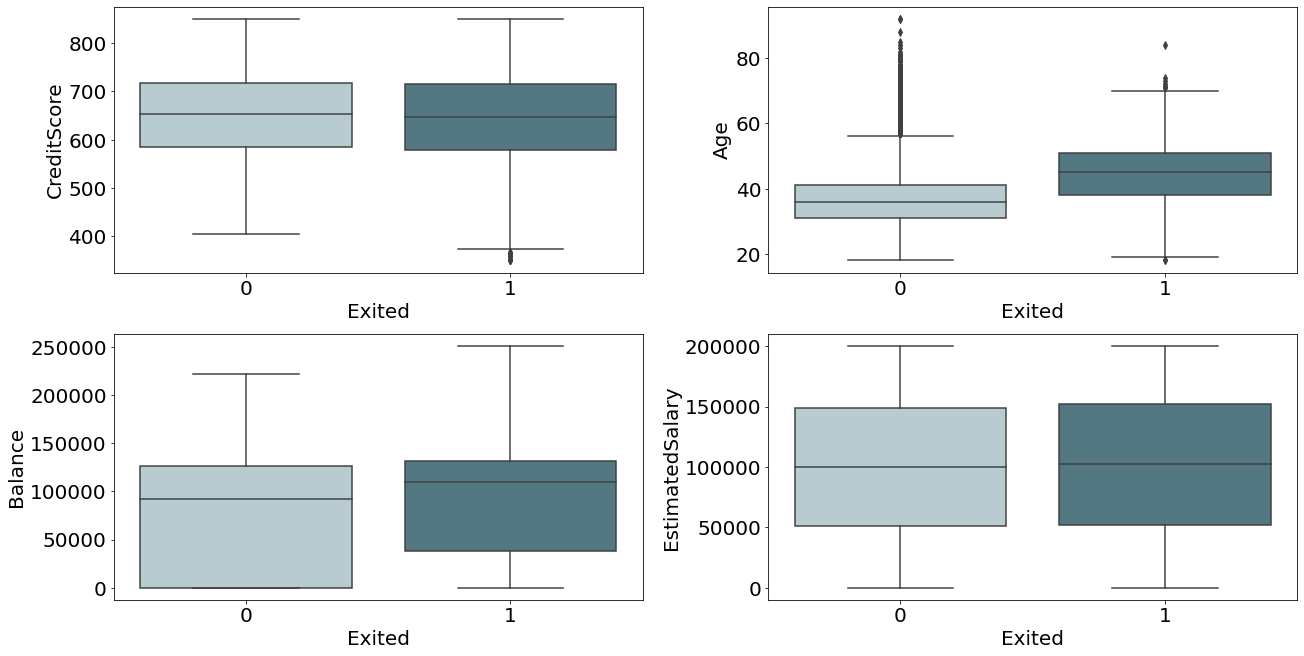

In [13]:
#sns.set_palette('crest')
plt.rcParams["figure.figsize"]=(18,9)
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.boxplot(y='CreditScore',  x='Exited', data = df, palette = col2)

ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.boxplot( 'Exited','Age',data = df, palette = col2)

ax3 = fig.add_subplot(gs[1,0])
ax3 = sns.boxplot('Exited','Balance',data = df, palette = col2)

ax4 = fig.add_subplot(gs[1,1])
ax4 = sns.boxplot('Exited', 'EstimatedSalary', data = df, palette = col2)

Looking at the boxplots above we can assume that our numeric variables don't affect much the target variable. Only in case of variable 'age' see the average age of those who closed their account in bank is higher.

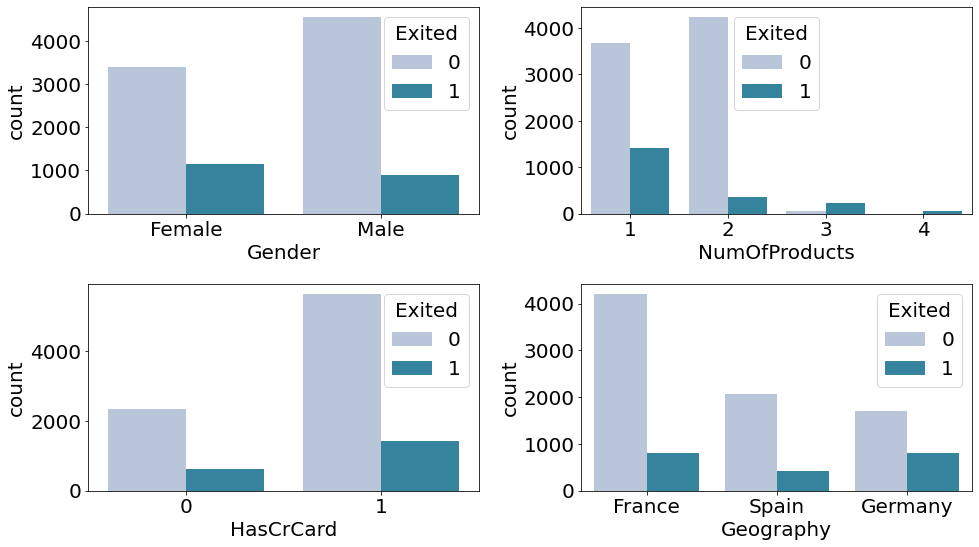

In [14]:
plt.rcParams["figure.figsize"]=(14,8)
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.countplot(x="Gender", hue="Exited",data=df, palette = 'PuBuGn')
ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.countplot(x="NumOfProducts", hue="Exited",data=df, palette = 'PuBuGn')
ax3 = fig.add_subplot(gs[1,0])
ax3 = sns.countplot(x="HasCrCard", hue="Exited",data=df, palette = 'PuBuGn')
ax4 = fig.add_subplot(gs[1,1])
ax4 = sns.countplot(x="Geography", hue="Exited",data=df, palette = 'PuBuGn')

total = len(df)
for p in ax1.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

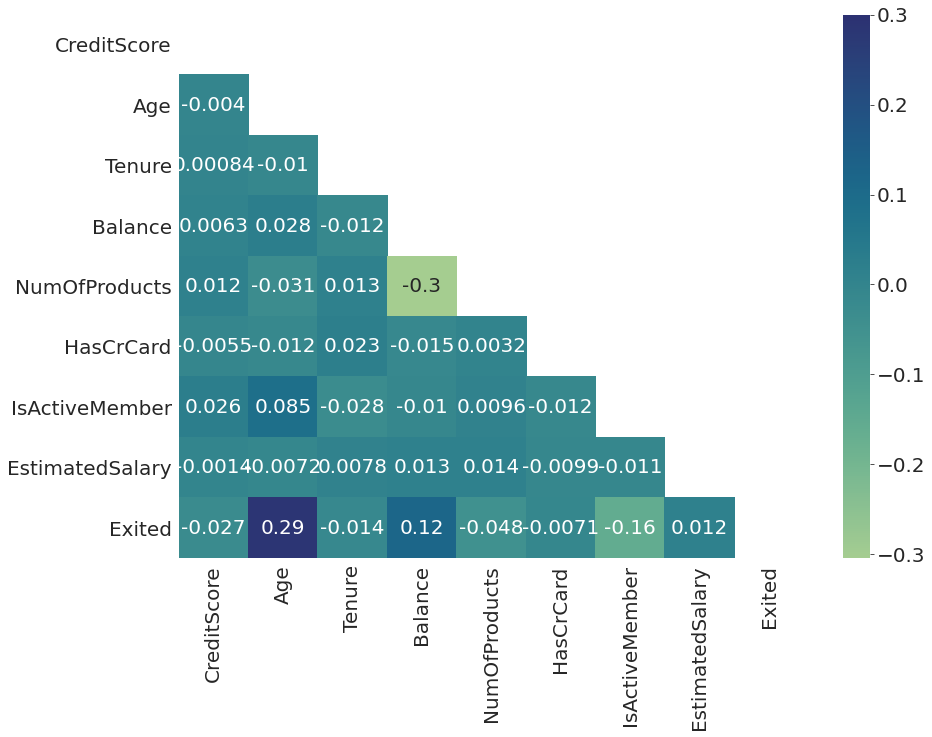

In [15]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(corr, mask=mask, vmax=.3,  annot = True, cmap = 'crest')

#sns.heatmap(corr, annot = True, cmap = 'crest')

From the correlation matrix above we can see that features don't have linear relationship among each other. 

## Data preprocessing 

In [16]:
df = pd.get_dummies(df, columns = ['Geography','Gender', 'HasCrCard', 'IsActiveMember' ],drop_first=True)

In [17]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1


In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,0,1,1


As we have data that has large differences between its ranges, for instance 'the number of products' or 'age' and 'balance', we will standardize our numeric columns.

In [20]:
X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']] = StandardScaler().fit_transform(X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']])


### As we've seen above the data is inbalanced which is not good for modelling because it can cause overfitting. Anyway let's try both methods: model with inbalanced data and then with balanced one. 

## - Without balancing data

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,0,0,1,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,1,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,1,0,1,1


In [22]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state = 16) #splitting data into test and train part with 80/20 method.
print(f"Number of observations \nTrain set: {len(train_x)}\nTest set: {len(test_x)}")
print('-'*100)
print("Didn't exit:", round(df['Exited'].value_counts()[0]))
print('Exited:', round(df['Exited'].value_counts()[1]))

Number of observations 
Train set: 8000
Test set: 2000
----------------------------------------------------------------------------------------------------
Didn't exit: 7963
Exited: 2037


We'll have 4 models mentionned below:

In [23]:
Logistic = LogisticRegression(random_state=16)
Knn = KNeighborsClassifier(n_neighbors=5)
RFC = RandomForestClassifier(n_estimators=100, random_state=16) 
DT = DecisionTreeClassifier(max_depth = 20)

Here we have a function that takes as an argument classifiers, fits the model, predicts and then calcultes some accuracy metrics:

* Accuracy: "TP+TN/TP+FP+FN+TN" - It is simply a ratio of correctly predicted observation to the total observations. 

* Recall: "TP/TP+FN" - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

* Precision: "TP/TP+FP" - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

In [24]:
def results(cls_list):
    indx = [ 'Acc_train', 'Acc_test', 'Recall_test', 'Precision_test']
    
    results = pd.DataFrame(index=indx, columns=['Dt', 'Logistic', 'Knn', 'RFC'])
    
    for i, cls in enumerate(cls_list):
        cls.fit(train_x,train_y)
        test_y_new = cls.predict(test_x)    
        train_y_new = cls.predict(train_x)
        acc_train = accuracy_score(train_y,train_y_new)
        acc_test = accuracy_score(test_y,test_y_new)
        rec_test = recall_score(test_y,test_y_new)
        pr_test = precision_score(test_y,test_y_new)
        name = results.columns[i]
        results[name] = [acc_train, acc_test, rec_test, pr_test]
    return results          

In [25]:
classifiers = [DT, Logistic, Knn, RFC]
res = results(classifiers)
res

,Dt,Logistic,Knn,RFC
Acc_train,0.996750,0.810500,0.883625,0.999875
Acc_test,0.787000,0.808500,0.835000,0.861500
Recall_test,0.498789,0.232446,0.450363,0.484262
Precision_test,0.484706,0.592593,0.643599,0.757576


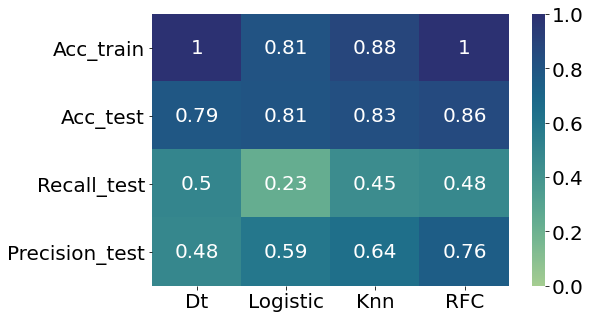

In [26]:
plt.figure(figsize = (8, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'crest',
               vmin = 0, 
               vmax = 1)

We can see that we have an overfiting problem: good results of accuracy but recall and precision rates on test set show that we have problems with models. The small rate of recall is indicator of many false negatives, and precision rate shows that we have problem with false positives as well.

### Trying different number of neighbors for Knn classifier

In [27]:
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    
    train_accuracy[i] = knn.score(train_x, train_y)
    test_accuracy[i] = knn.score(test_x, test_y)

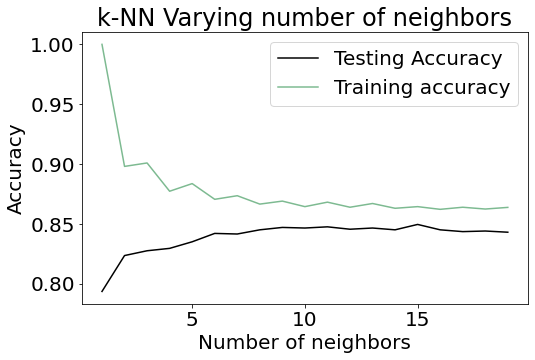

In [28]:
plt.figure(figsize = (8, 5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', color = 'black')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## - With Balanced data (downscaling)

In [29]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Only approximately 20% of available dataset consists of people who closed their bank account. To say in numbers 2037 people. So we will randomly 'take' 2037 people from our data who stayed as a customer.

The main disadvantage is that we lose 0.5926% of data.

In [30]:
majority = df[df.Exited==0]
minority = df[df.Exited==1]
 
downsampled = resample(majority, 
                       replace=False,    
                       n_samples=2037,     
                       random_state=16) 

downsampled = pd.concat([downsampled, minority])
 
downsampled['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

<Figure size 576x360 with 0 Axes>

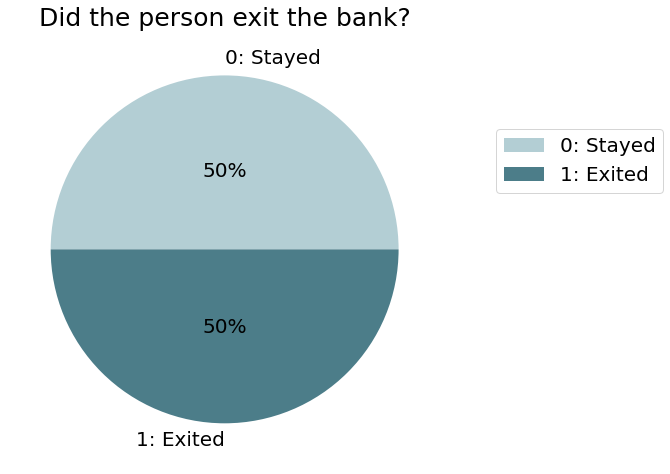

The 50.0  of customers didn't exit.
The 50.0 % of customers exited.


In [31]:
plt.figure(figsize = (8, 5))
fig, ax = plt.subplots()
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size']=20
labels = ['0: Stayed', '1: Exited']
percentages = downsampled['Exited'].value_counts()/sum(downsampled['Exited'].value_counts()) *100
ax.pie(percentages,  labels=labels, autopct='%1.0f%%', startangle=0,pctdistance=0.45, colors = col2)
ax.set_title("Did the person exit the bank?", size = 25)
ax.legend(bbox_to_anchor=(1.1,0.8))
plt.show()
print("The", round(downsampled['Exited'].value_counts()[0]/len(downsampled) * 100,2), " of customers didn't exit.")
print('The', round(downsampled['Exited'].value_counts()[1]/len(downsampled) * 100,2), '% of customers exited.')

In [32]:
y = downsampled['Exited']
X = downsampled.drop(columns='Exited', axis = 1)

In [33]:
X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']] = StandardScaler().fit_transform(X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']])
X.head()
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=16)

print(f"Number of observations: \nTrain set: {len(train_x)}\nTest set: {len(test_x)}")

Number of observations: 
Train set: 3259
Test set: 815


In [34]:
res = results(classifiers)
res

,Dt,Logistic,Knn,RFC
Acc_train,1.000000,0.708806,0.822031,1.000000
Acc_test,0.714110,0.698160,0.757055,0.801227
Recall_test,0.730479,0.680101,0.748111,0.785894
Precision_test,0.697115,0.694087,0.751899,0.802057


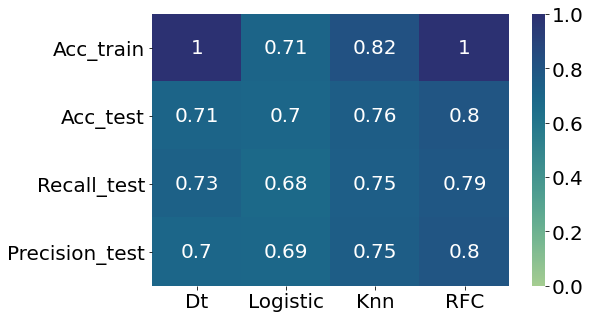

In [35]:
plt.figure(figsize = (8, 5))
s = sns.heatmap(res,
               annot = True, 
               cmap = 'crest',
               vmin = 0, 
               vmax = 1)

The matrix shows us that the model has improved as now both accuracy and recall/precision rates are rather higher.

### Knn with different parameters

In [36]:
neighbors = np.arange(4,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    
    train_accuracy[i] = knn.score(train_x, train_y)
    test_accuracy[i] = knn.score(test_x, test_y)

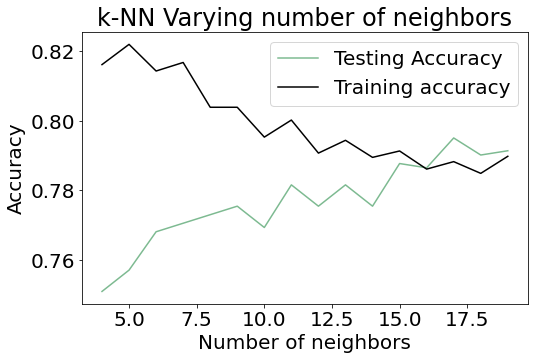

In [37]:
plt.figure(figsize = (8, 5))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy', color = 'black')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Knn with GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [10,11,12,13,14,15,16,17,18,19,20],
    'metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1, 
)

gs_results = gs.fit(train_x, train_y)

Fitting 3 folds for each of 22 candidates, totalling 66 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    6.0s finished


In [39]:
gs_results.best_score_

0.7618907643939793

In [40]:
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [41]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 19}

In [42]:
knn15 = KNeighborsClassifier(n_neighbors=15, metric = 'manhattan')
knn15.fit(train_x,train_y)
test_y_new = knn15.predict(test_x)    
train_y_new = knn15.predict(train_x)
acc_train = accuracy_score(train_y,train_y_new)
acc_test = accuracy_score(test_y,test_y_new)
rec_test = recall_score(test_y,test_y_new)
pr_test = precision_score(test_y,test_y_new)

print(f"Accuracy_train:{round(acc_train,2)}\nAccuracy_test:{round(acc_test,2)}\nRecall_test:{round(rec_test,2)}\nPrecision_test:{round(pr_test,2)}")

Accuracy_train:0.79
Accuracy_test:0.79
Recall_test:0.76
Precision_test:0.79


### Decision tree with GridSearch

In [43]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[5,10,15,20,23,25,28,30,32,34,36,38,40]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
clf.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 23, 25, 28, 30, 32, 34,
                                       36, 38, 40]})

In [44]:
clf.best_score_

0.7634177716208193

In [45]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [46]:
dt_gs = DecisionTreeClassifier(criterion = 'entropy', max_depth= 5)

dt_gs.fit(train_x,train_y)
test_y_new = dt_gs.predict(test_x)    
train_y_new = dt_gs.predict(train_x)
acc_train = accuracy_score(train_y,train_y_new)
acc_test = accuracy_score(test_y,test_y_new)
rec_test = recall_score(test_y,test_y_new)
pr_test = precision_score(test_y,test_y_new)

print(f"Accuracy_train:{round(acc_train,2)}\nAccuracy_test:{round(acc_test,2)}\nRecall_test:{round(rec_test,2)}\nPrecision_test:{round(pr_test,2)}")

Accuracy_train:0.78
Accuracy_test:0.78
Recall_test:0.76
Precision_test:0.79


# K-Means Clustering

In [47]:
df_std = df.copy()
df_std[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']] = StandardScaler().fit_transform(df_std[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']])

In [48]:
# Loop and count Within Cluster Sum of Squares
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)


We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method).


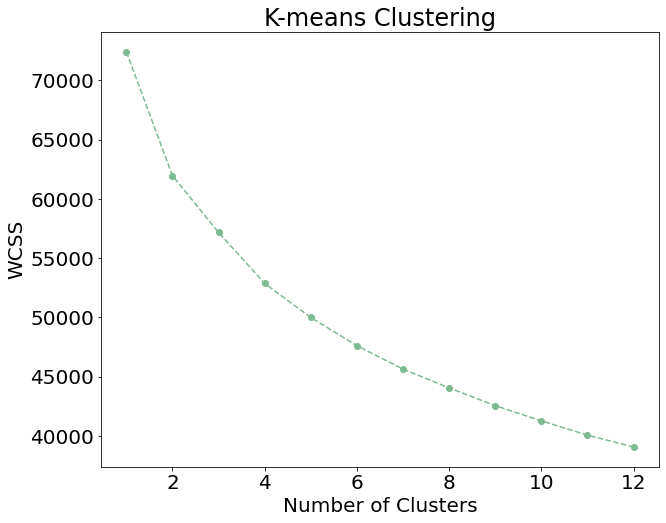

In [49]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 13), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 16) #‘k-means++’selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
kmeans.fit(df_std)

KMeans(n_clusters=6, random_state=16)

In [51]:
labels = df_std.copy()
labels['Segments'] = kmeans.labels_
labels.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,Segments
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,0,0,0,1,1,2
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,0,1,0,0,1,2
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,0,0,0,1,0,4
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0,0,0,3
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,0,1,0,1,1,2


In [52]:
df['segments'] = labels['Segments']
df.groupby('segments').mean()[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

,CreditScore,Age,Balance,NumOfProducts,EstimatedSalary
segments,,,,,
0,652.289623,60.559434,76827.470415,1.343396,96146.415132
1,659.370857,36.721199,118427.926107,1.000000,100076.253845
2,640.012896,36.342826,114929.164191,1.002149,101231.016593
3,645.464814,35.947960,3662.720645,1.845653,47871.163365
4,654.571732,37.004782,123690.228443,2.137620,103248.399495
5,651.680997,35.609346,3382.206611,1.849221,152702.612604


In [53]:
df['segments'] = labels['Segments']
df.groupby(['segments', 'Exited']).mean()[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

CreditScore        Age        Balance  NumOfProducts  \
segments Exited                                                         
0        0        654.458961  63.288107   72876.831256       1.447236   
         1        649.492441  57.041037   81921.491102       1.209503   
1        0        658.970688  35.491479  117838.768828       1.000000   
         1        660.723502  40.877880  120419.386313       1.000000   
2        0        644.777163  34.977855  115355.889315       1.001384   
         1        623.463942  41.084135  113446.909856       1.004808   
3        0        645.105089  35.368804    3654.067667       1.861864   
         1        648.522472  40.870787    3736.270955       1.707865   
4        0        656.020053  35.647059  124077.809753       2.006684   
         1        648.958549  42.266839  122188.099845       2.645078   
5        0        653.378547  35.051903    3498.677017       1.868512   
         1        636.350000  40.643750    2330.333250       1.675000   

                 EstimatedSalary  
segments Exited                   
0        0          94599.975879  
         1          98140.419957  
1        0          99394.150995  
         1         102381.887212  
2        0         100998.840464  
         1         102037.493774  
3        0          47775.748863  
         1          48682.186629  
4        0         103208.776370  
         1         103401.964767  
5        0         151765.430187  
         1         161166.541312

In [54]:
df.groupby('segments').agg(pd.Series.mode)[['Gender_Male', 'HasCrCard_1', 'IsActiveMember_1', 'Exited']]

,Gender_Male,HasCrCard_1,IsActiveMember_1,Exited
segments,,,,
0,1,1,1,0
1,1,1,0,0
2,1,1,1,0
3,1,1,1,0
4,1,1,0,0
5,1,1,0,0


In [55]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_1', 'IsActiveMember_1', 'segments'],
      dtype='object')

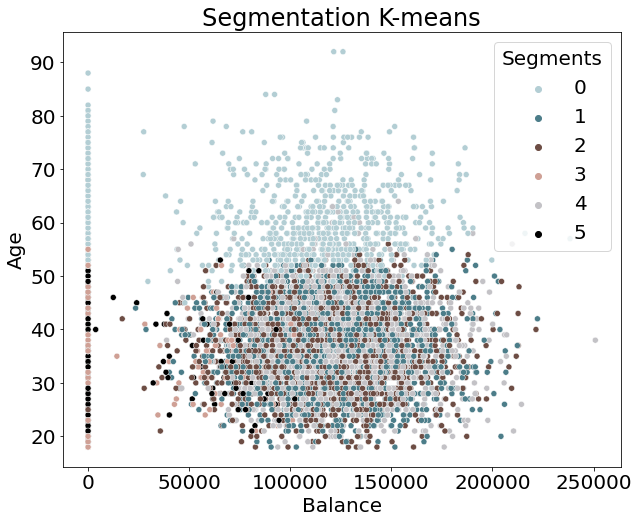

In [56]:
col2 = ['#b3ced4', "#4c7d89", "#6d4d44", "#cfa095", "#c3c2c6", 'black']
x_axis = df['Balance']
y_axis = df['Age']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = labels['Segments'], palette = col2)
plt.title('Segmentation K-means')
plt.show()

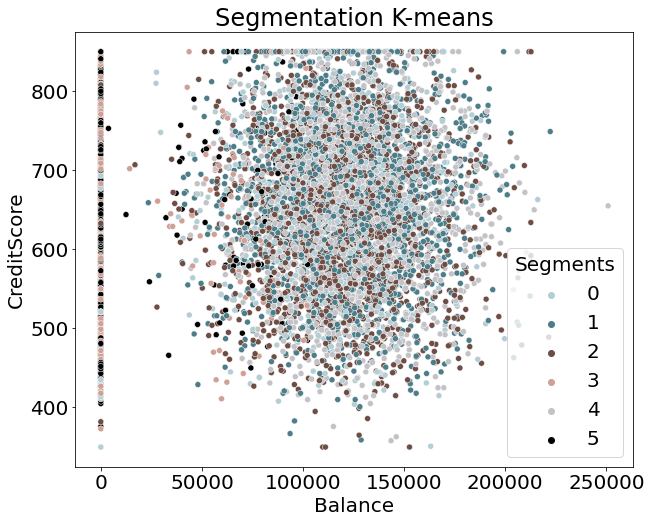

In [57]:
x_axis = df['Balance']
y_axis = df['CreditScore']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = labels['Segments'], palette = col2)
plt.title('Segmentation K-means')
plt.show()

# PCA

In [58]:
pca_df = df.copy()
pca_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']] = StandardScaler().fit_transform(pca_df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']])
pca_df = pca_df.drop('Exited', axis = 1)

In [59]:
pca_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1,segments
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,0,0,0,1,1,2
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,1,0,0,1,2
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,0,0,0,1,0,4
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,0,0,0,0,3
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,1,0,1,1,2


In [60]:
pca = PCA()
pca.fit(pca_df)
pca.explained_variance_ratio_

array([0.35733068, 0.11317348, 0.10403647, 0.10354814, 0.10261723,
       0.07850638, 0.034544  , 0.02635425, 0.02482078, 0.02220252,
       0.02114207, 0.01172401])

Text(0, 0.5, 'Cumulative Explained Variance')

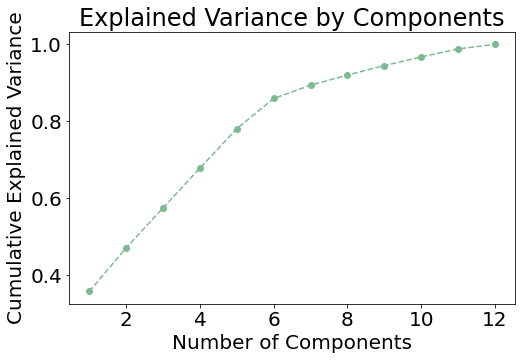

In [62]:
plt.style.context('seaborn-whitegrid')
plt.figure(figsize = (8,5))
plt.plot(range(1,13), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [63]:
pca = PCA(n_components = 5)
pca.fit(pca_df)
pca_data=pca.transform(pca_df)
pca_data=pd.DataFrame(data=pca_data,columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5'])
pca_data.head()

,Component 1,Component 2,Component 3,Component 4,Component 5
0,-0.585678,0.436550,1.049543,0.349054,0.288445
1,-0.868049,-0.471481,1.336714,0.410540,0.398783
2,1.708777,0.231441,-0.871956,1.578171,0.002195
3,0.988278,0.757103,1.299434,-0.535349,0.448708
4,-1.168093,-0.387534,0.896846,-2.108939,0.539112


## K-Means clustering after PCA

In [64]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, random_state = 42)
    kmeans_pca.fit(pca_data)
    wcss.append(kmeans_pca.inertia_)

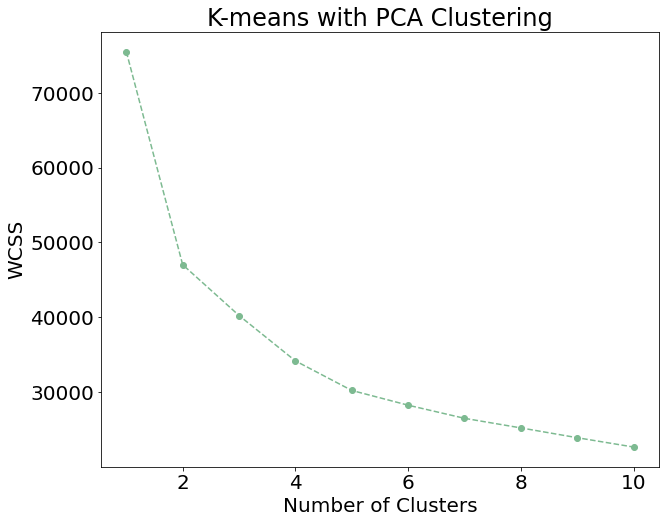

In [65]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [66]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 16)
kmeans_pca.fit(pca_data)
pca_data['labels'] = kmeans.labels_

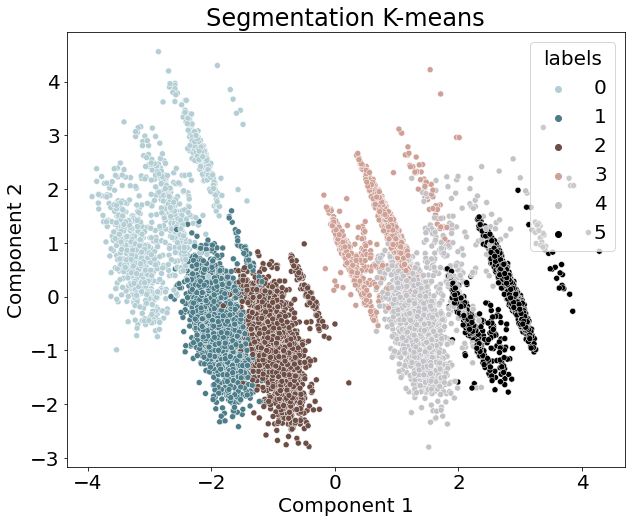

In [67]:
col2 = ['#b3ced4', "#4c7d89", "#6d4d44", "#cfa095", "#c3c2c6", 'black']
x_axis = pca_data['Component 1']
y_axis = pca_data['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = pca_data['labels'], palette = col2)
plt.title('Segmentation K-means')
plt.show()

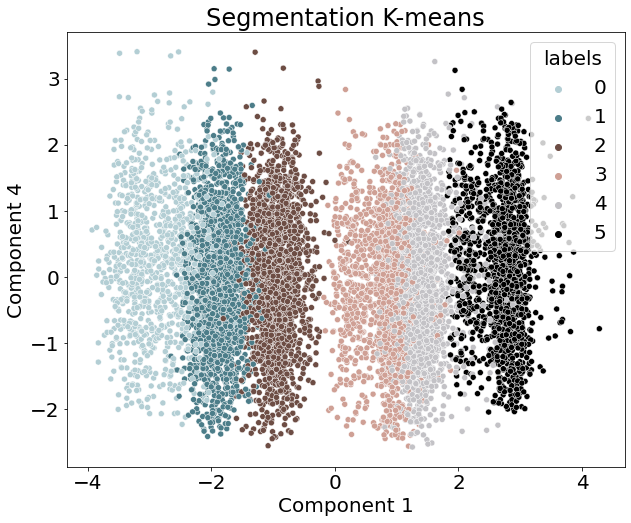

In [68]:
col2 = ['#b3ced4', "#4c7d89", "#6d4d44", "#cfa095", "#c3c2c6", 'black']
x_axis = pca_data['Component 1']
y_axis = pca_data['Component 4']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = pca_data['labels'], palette = col2)
plt.title('Segmentation K-means')
plt.show()

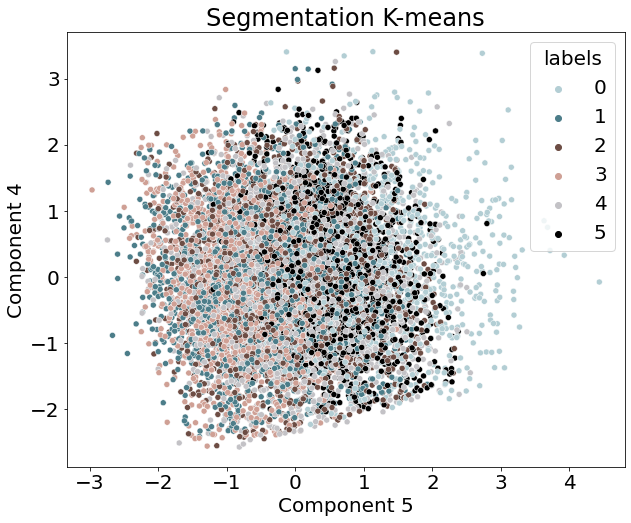

In [69]:
col2 = ['#b3ced4', "#4c7d89", "#6d4d44", "#cfa095", "#c3c2c6", 'black']
x_axis = pca_data['Component 5']
y_axis = pca_data['Component 4']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = pca_data['labels'], palette = col2)
plt.title('Segmentation K-means')
plt.show()

## Thank you!